# Subclustering of Post.Endo. / Hindgut/ Ecto.PS14

In [1]:
#loading packages
library(Seurat)
library(ggplot2)
library(magrittr)
library(data.table)
library(Matrix)
library(dplyr)
library(tibble)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
#loading data
seu_HQC <- readRDS(file = '../../data/seurat_object/Set1/seu_HQC2_Set1.obj')
seu_HQC

An object of class Seurat 
28877 features across 1018 samples within 2 assays 
Active assay: SCT (11281 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”


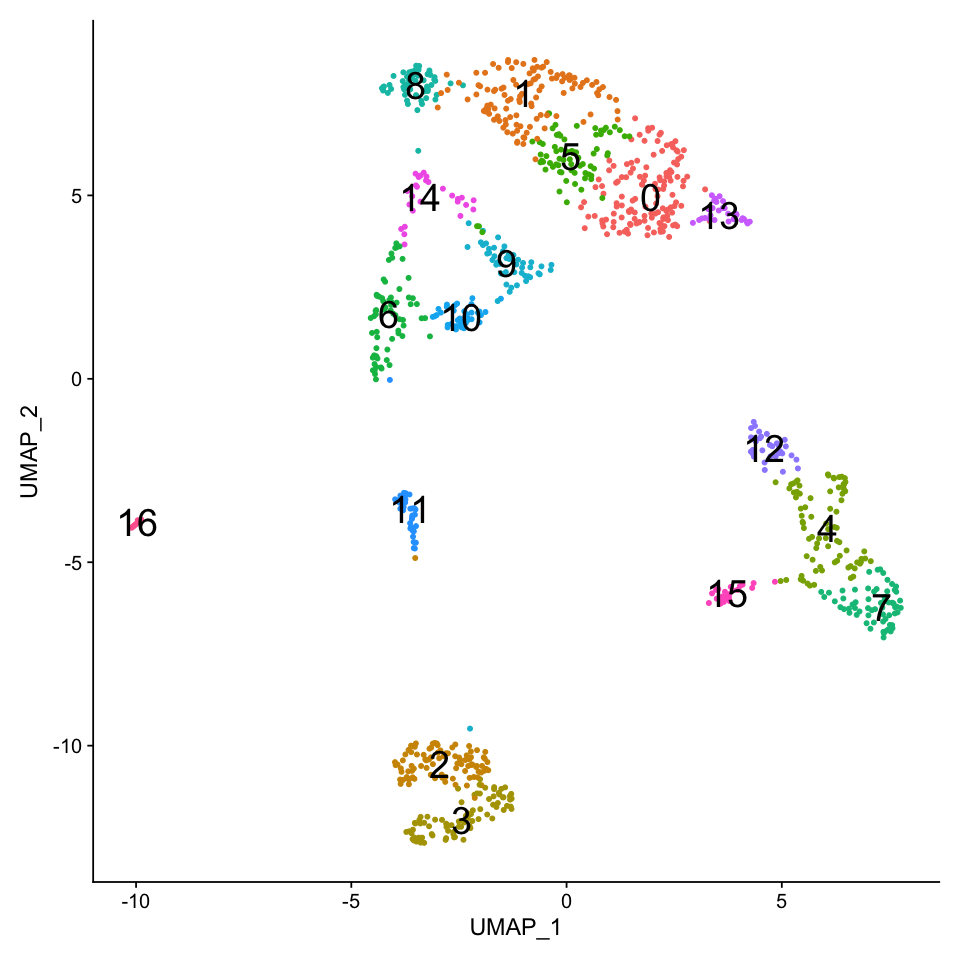

In [3]:
Idents(seu_HQC) <- 'seurat_clusters'
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(seu_HQC, reduction = 'umap', label = TRUE, label.size = 8) + NoLegend()

## Picking up target clusters

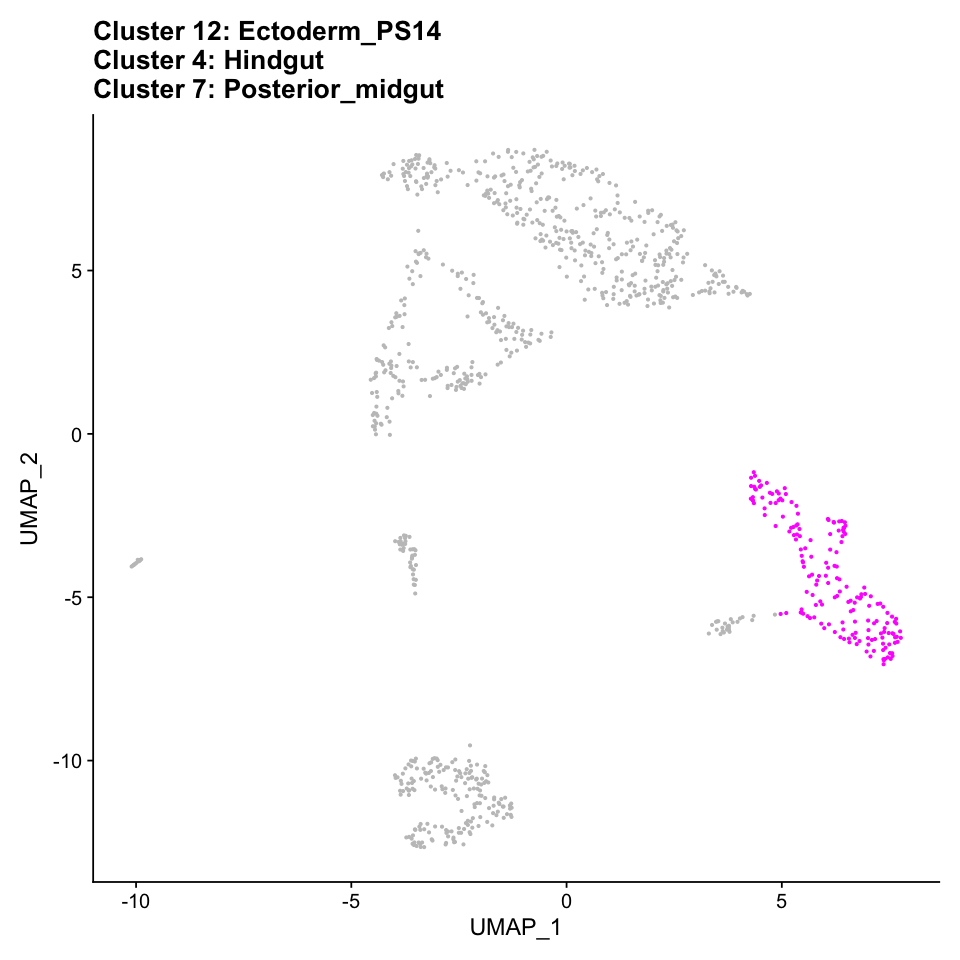

In [4]:
options(repr.plot.width=8, repr.plot.height=8)
highlight.cells <- WhichCells(seu_HQC,idents = c(12,4,7))
DimPlot(seu_HQC, reduction =  "umap", cells.highlight = highlight.cells, pt.size = 0.5, sizes.highlight = 0.5,
        cols.highlight = 'magenta', label = FALSE) + NoLegend() + ggtitle('Cluster 12: Ectoderm_PS14\nCluster 4: Hindgut\nCluster 7: Posterior_midgut')

In [5]:
seu.post <- subset(seu_HQC, idents = c(12,4,7))
seu.post

An object of class Seurat 
28877 features across 178 samples within 2 assays 
Active assay: SCT (11281 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [6]:
seu.post$cluster.allcell <- seu.post$seurat_clusters

## Clustering
Num of cells < 500. 
Skipping re-normalize

PC_ 1 
Positive:  fkh, Gmap, CG2930, Pepck-CG45087, ps, Fas2, mnd, Pdp1, Oatp74D, ImpE2 
	   fog, Myc, disco, aay, bnb, Ptx1, peb, hkb, a, Lapsyn 
	   srp, CG15236, CG32053, Notum, rib, smal, sas, Tis11, byn, exex 
Negative:  stg, tsh, hth, SoxN, trn, dan, Antp, sca, CG5059, Ilp4 
	   fz2, wech, opa, ImpL2, ths, Imp-CR45204, Ubx, mid, aop, HnRNP-K 
	   tkv, CadN, slp1, neur, zfh1, Tollo, Ama, pxb, toc, sty 
PC_ 2 
Positive:  salm, byn, disco, Blimp-1, ken, Lac, uif, Ptr, dpn, Abd-B 
	   rib, wg, Notum, klg, CG31871, hb, otp, 18w, cad, CG43355-sala 
	   CG45263, bnb, CG34383, CG13427, Myo31DF, Gmap, h, emc, 5-HT2A, ct 
Negative:  smal, hth, Nplp2, ImpE2, tsh, hkb, exex, srp, sna, bun 
	   peb, Oatp74D, Tis11, Ptx1, Ilp4, aay, esg, CG32053, CG1673, Ubx 
	   ltl, hll, CG12643, Mes2, Pdp1, MFS14, Toll-6, zfh1, Kr, Myc 
PC_ 3 
Positive:  sog, sim, drm, CG43355-sala, Ndae1, Zasp52, GlcAT-P, E(spl)m7-HLH, Mdr49, btl 
	   Kr, lncRNA:CR43432, Notum, E(spl)m4-BFM, CG9005, Dl, CG16758, brk, trn, 

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 178
Number of edges: 5603

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.5839
Number of communities: 4
Elapsed time: 0 seconds


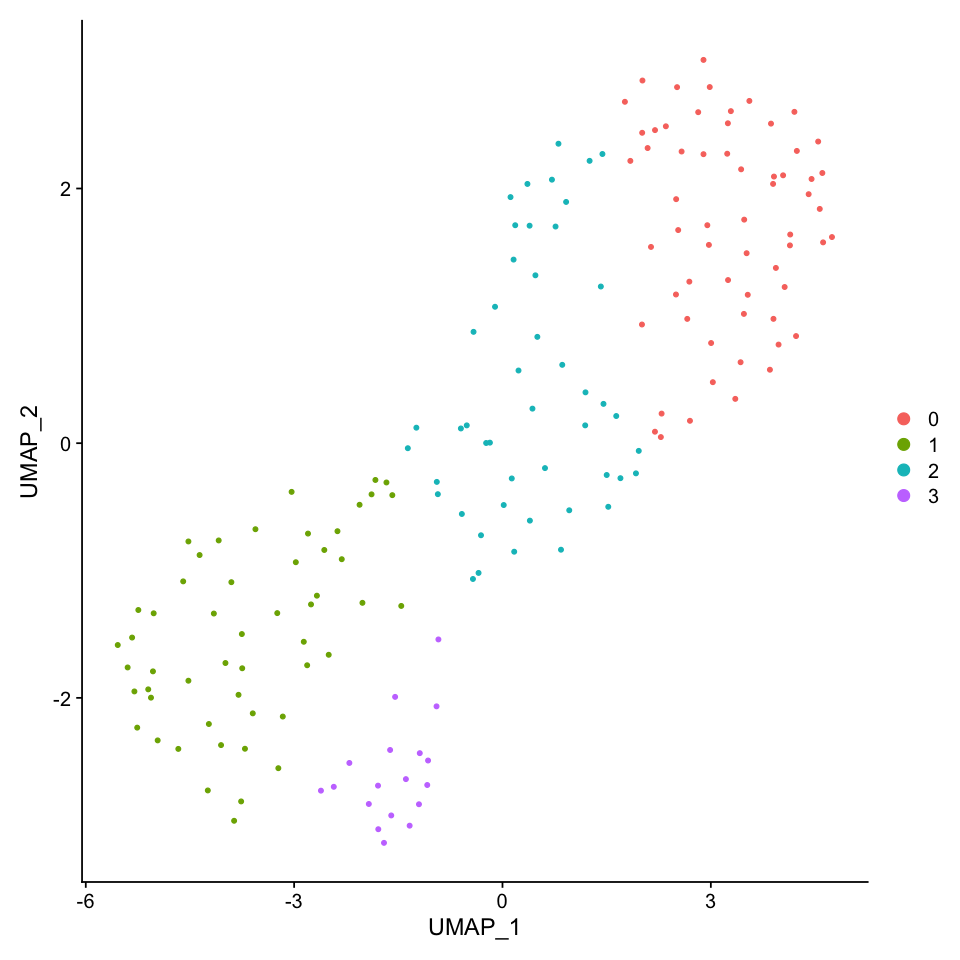

In [7]:
seu.post <- RunPCA(seu.post)
seu.post <- RunUMAP(seu.post, dims = 1:30)
seu.post <- FindNeighbors(seu.post, dims = 1:30)
seu.post <- FindClusters(seu.post)
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(seu.post, reduction = 'umap')

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 178
Number of edges: 5603

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.2108
Number of communities: 11
Elapsed time: 0 seconds


2 singletons identified. 9 final clusters.



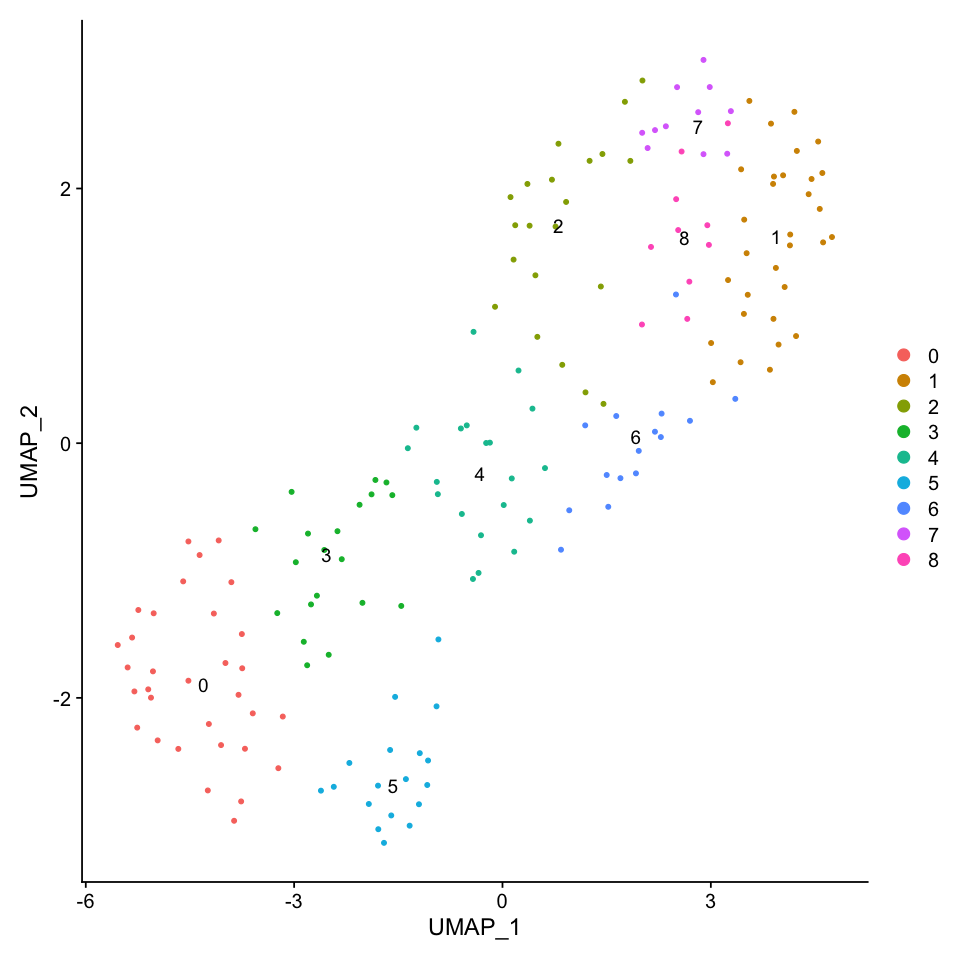

In [8]:
seu.post <- FindClusters(seu.post, resolution = 2.5)
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(seu.post, reduction = 'umap', label = T)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 178
Number of edges: 5603

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.2520
Number of communities: 9
Elapsed time: 0 seconds


1 singletons identified. 8 final clusters.



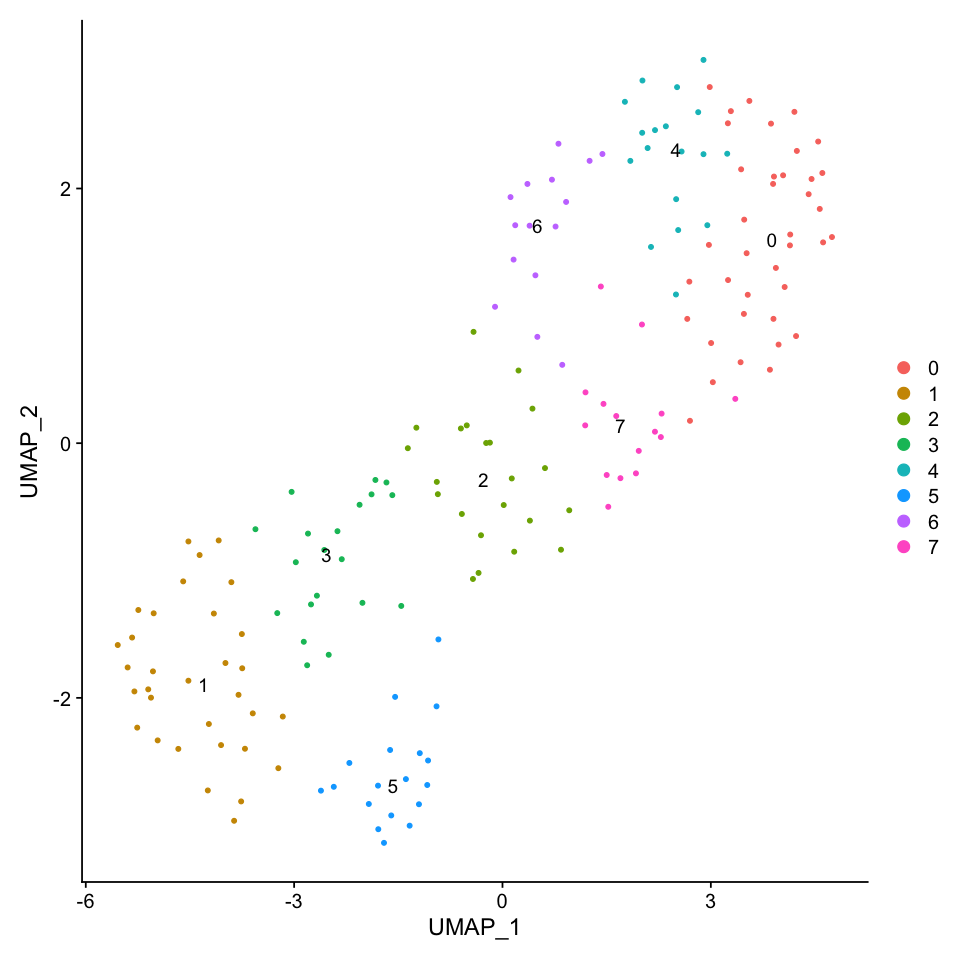

In [9]:
seu.post <- FindClusters(seu.post, resolution = 2.2)
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(seu.post, reduction = 'umap', label = T)

In [10]:
levels(seu.post) <- c(4,0,6,7,2,3,1,5)
all.markers.post <- FindAllMarkers(object = seu.post, only.pos = TRUE)
nrow(all.markers.post)
all.markers.post.top10 <- all.markers.post %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)
nrow(all.markers.post.top10)

Calculating cluster 4

Calculating cluster 0

Calculating cluster 6

Calculating cluster 7

Calculating cluster 2

Calculating cluster 3

Calculating cluster 1

Calculating cluster 5



[1] 1820

[1] 80

Warning message in DoHeatmap(seu.post, features = c(all.markers.post.top10$gene)):
“The following features were omitted as they were not found in the scale.data slot for the SCT assay: Myo10A, Unc-76, CG33494, gogo, CG34012, dunk”


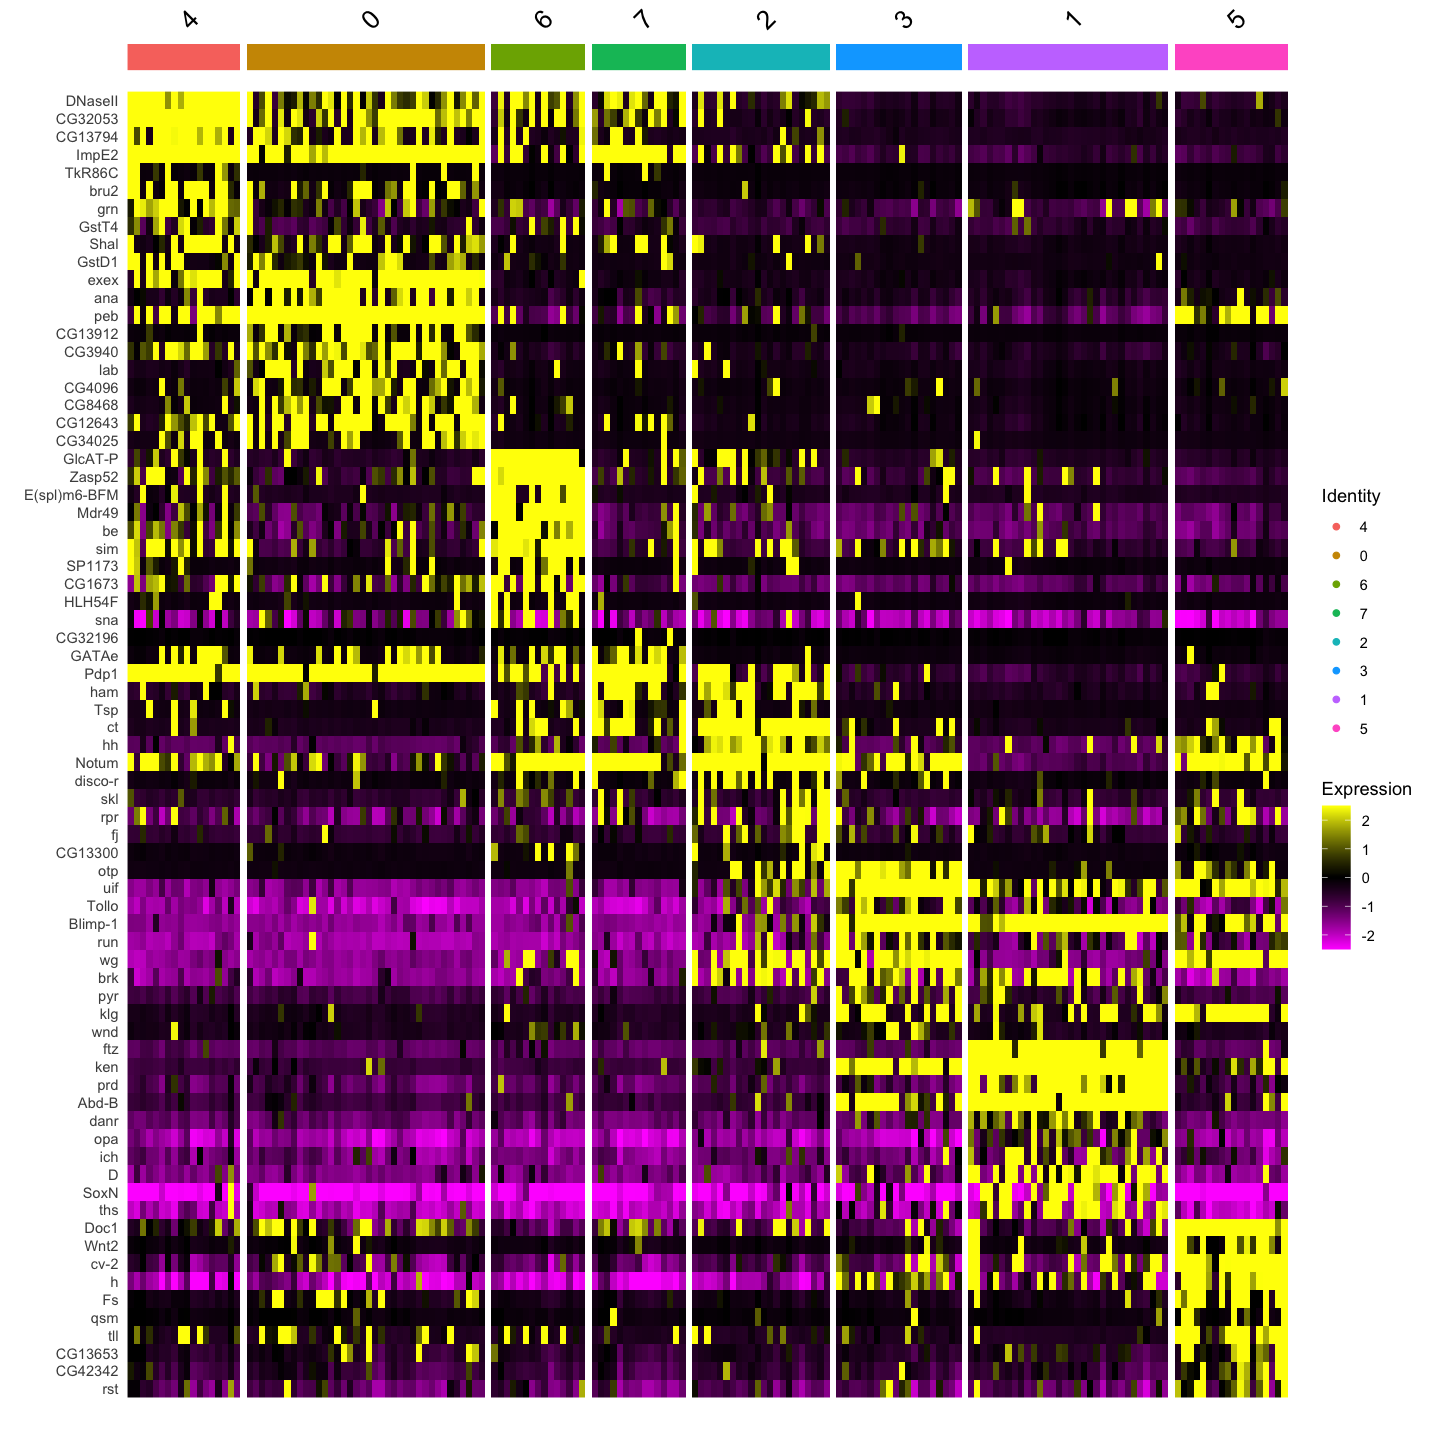

In [11]:
options(repr.plot.width=12, repr.plot.height=12)
DoHeatmap(seu.post, features = c(all.markers.post.top10$gene))

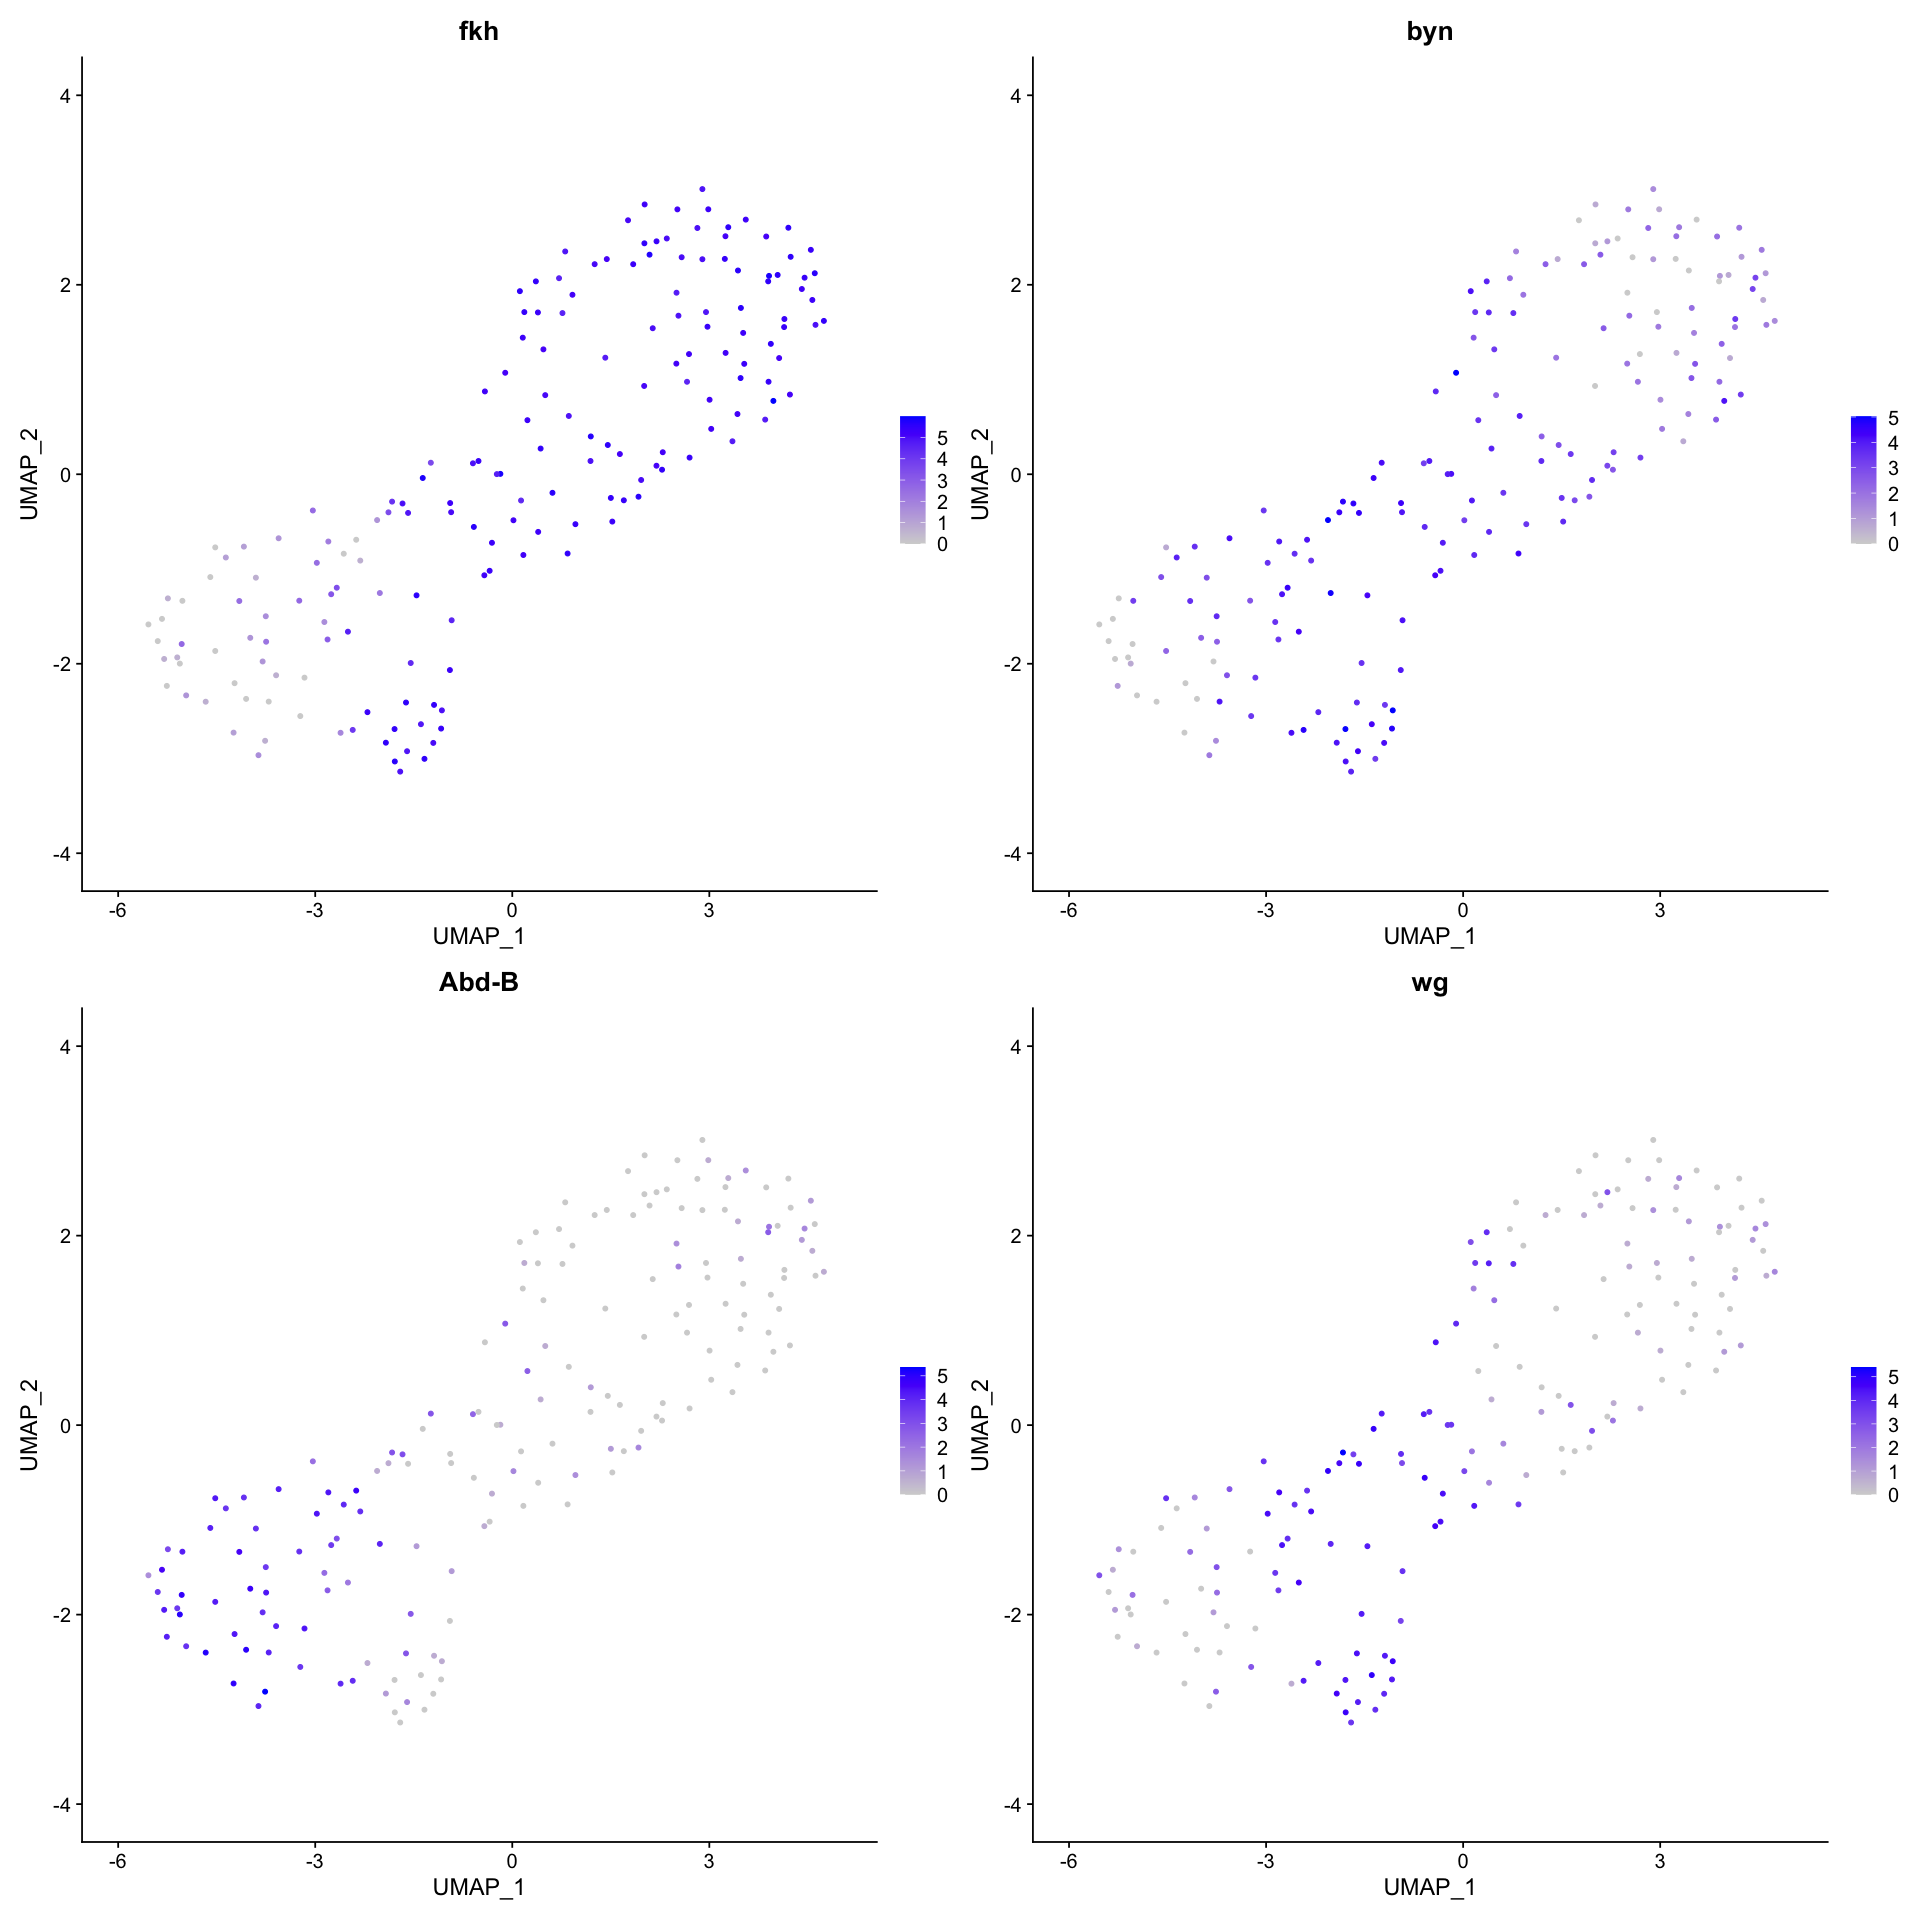

In [12]:
options(repr.plot.width=16, repr.plot.height=16)
FeaturePlot(seu.post, reduction = "umap", features = c("fkh", "byn", "Abd-B", "wg"), pt.size = 1,  ncol = 2)

Cluster 3 expressed both of byn (Hindgut marker) and Abd-B(PS14 marker)

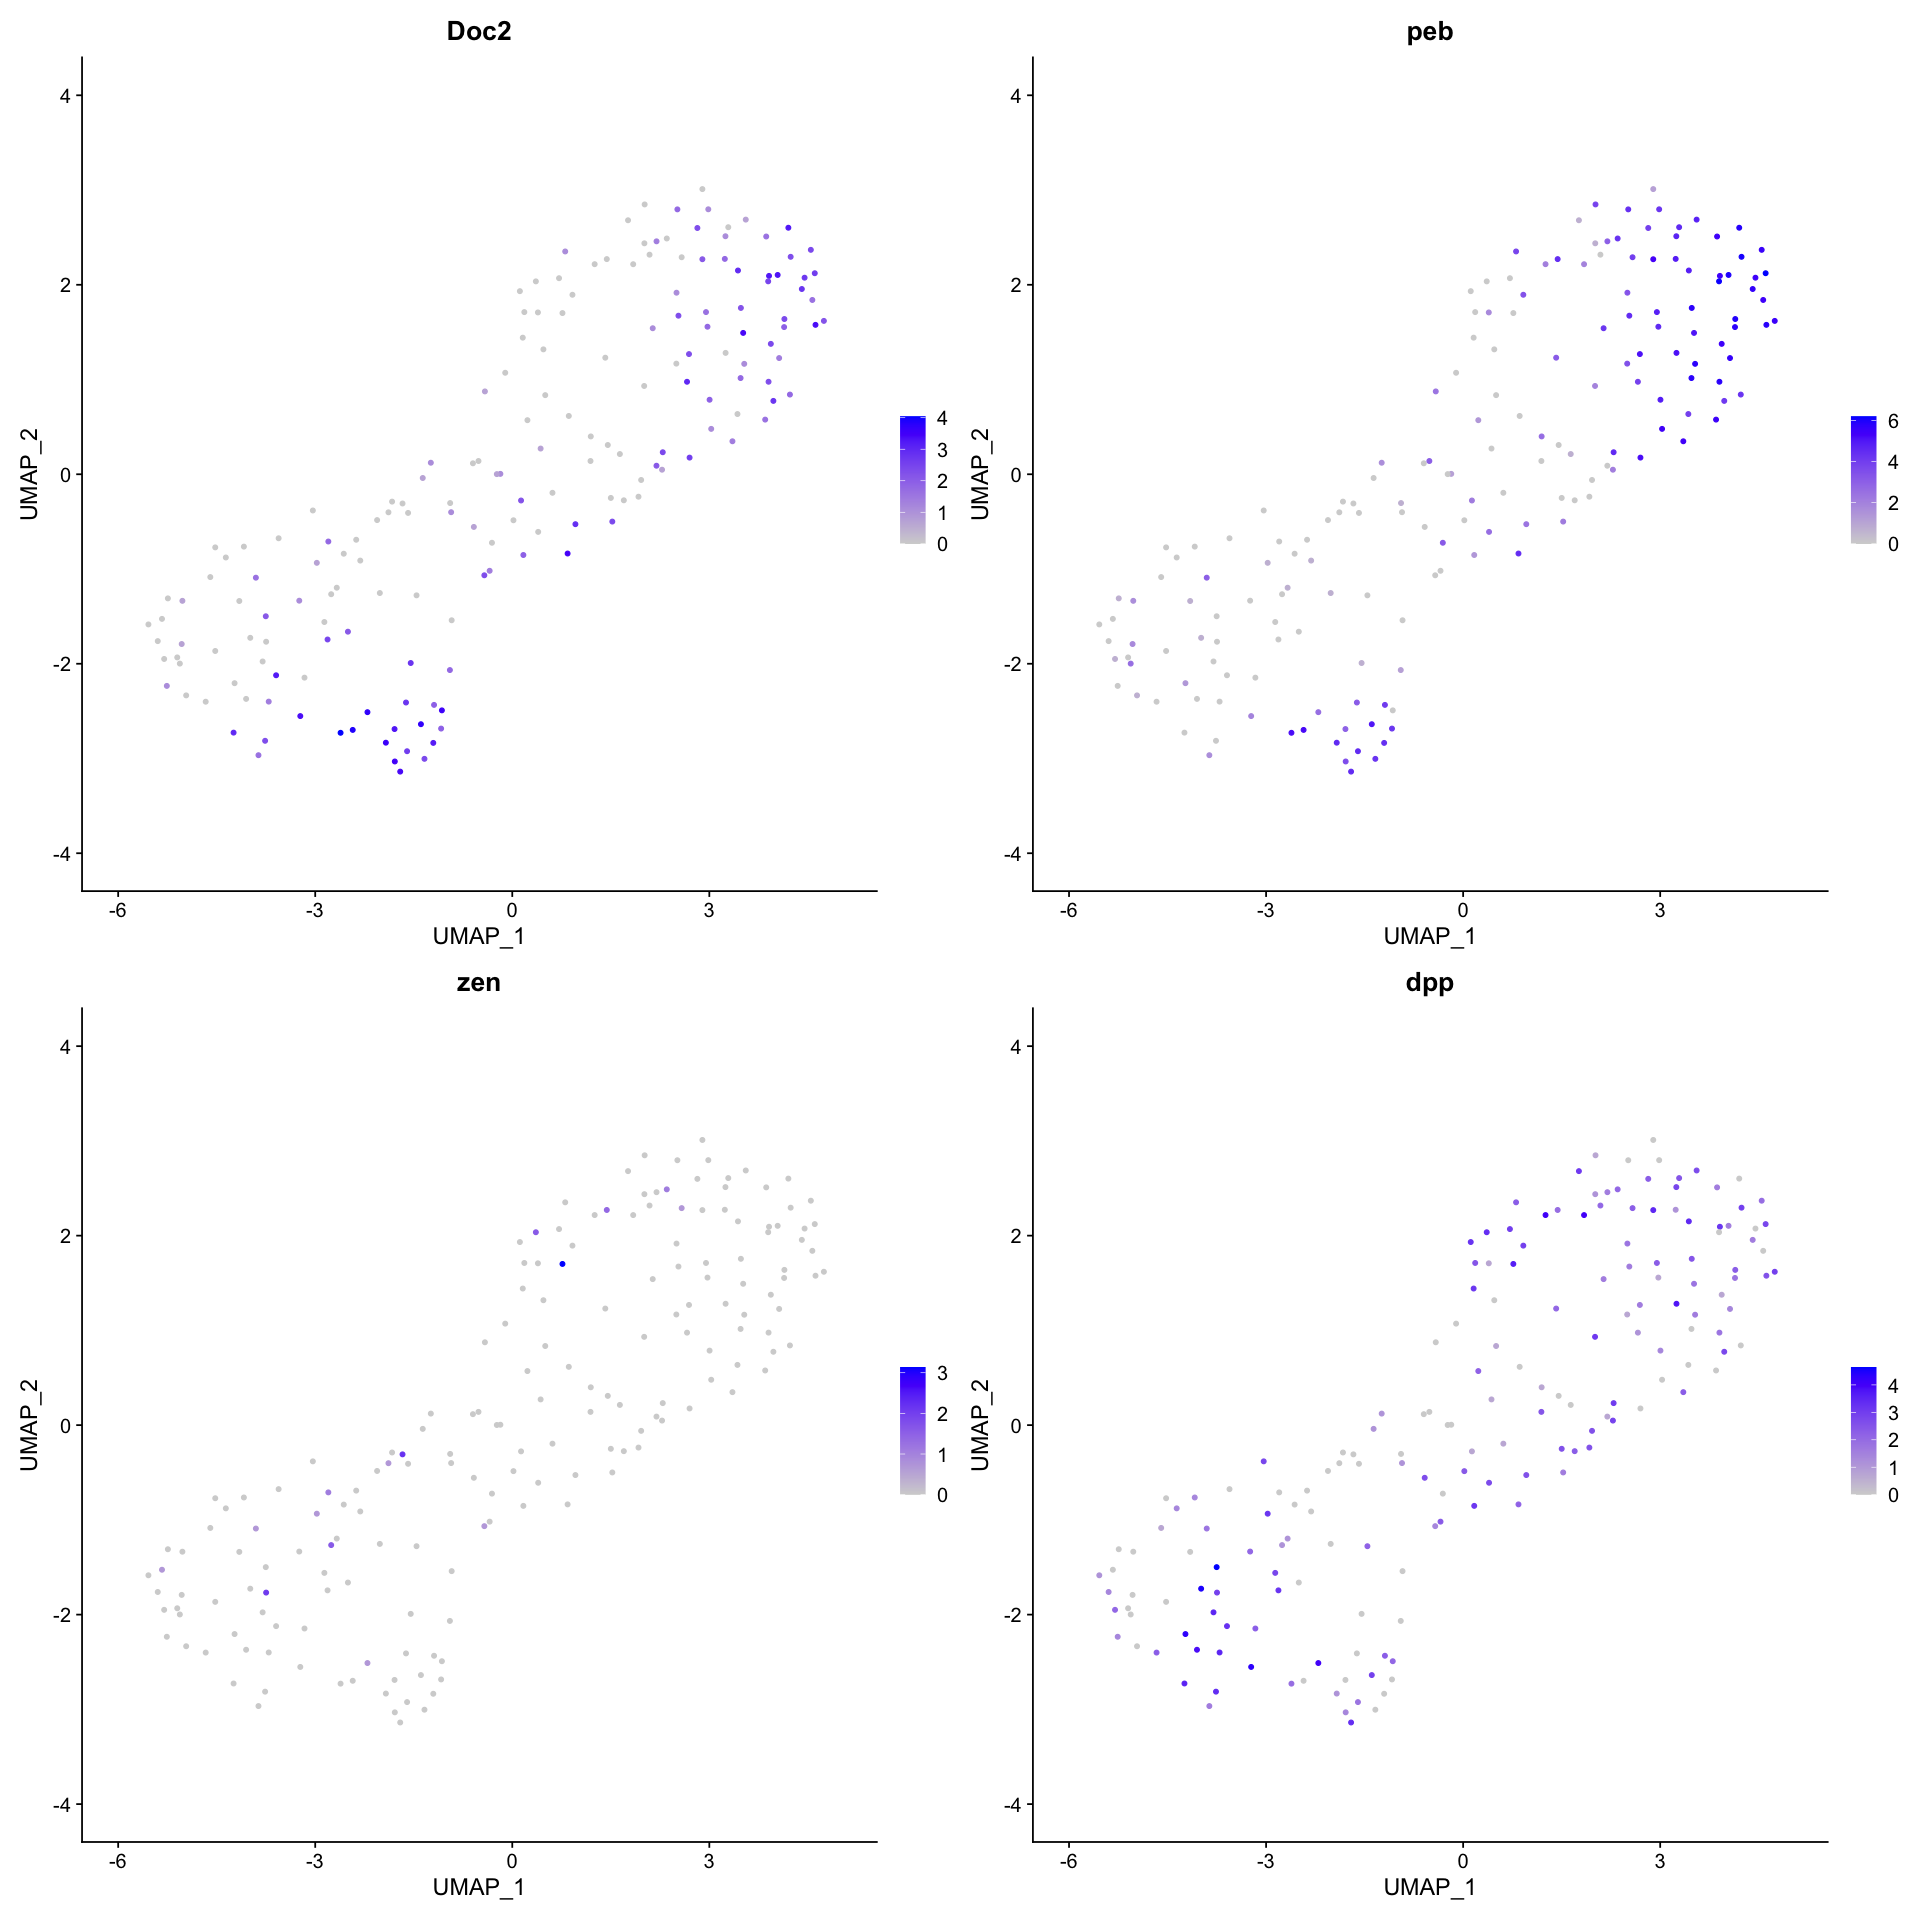

In [13]:
options(repr.plot.width=16, repr.plot.height=16)
FeaturePlot(seu.post, reduction = "umap", features = c("Doc2", "peb", "zen", "dpp"), pt.size = 1,  ncol = 2)

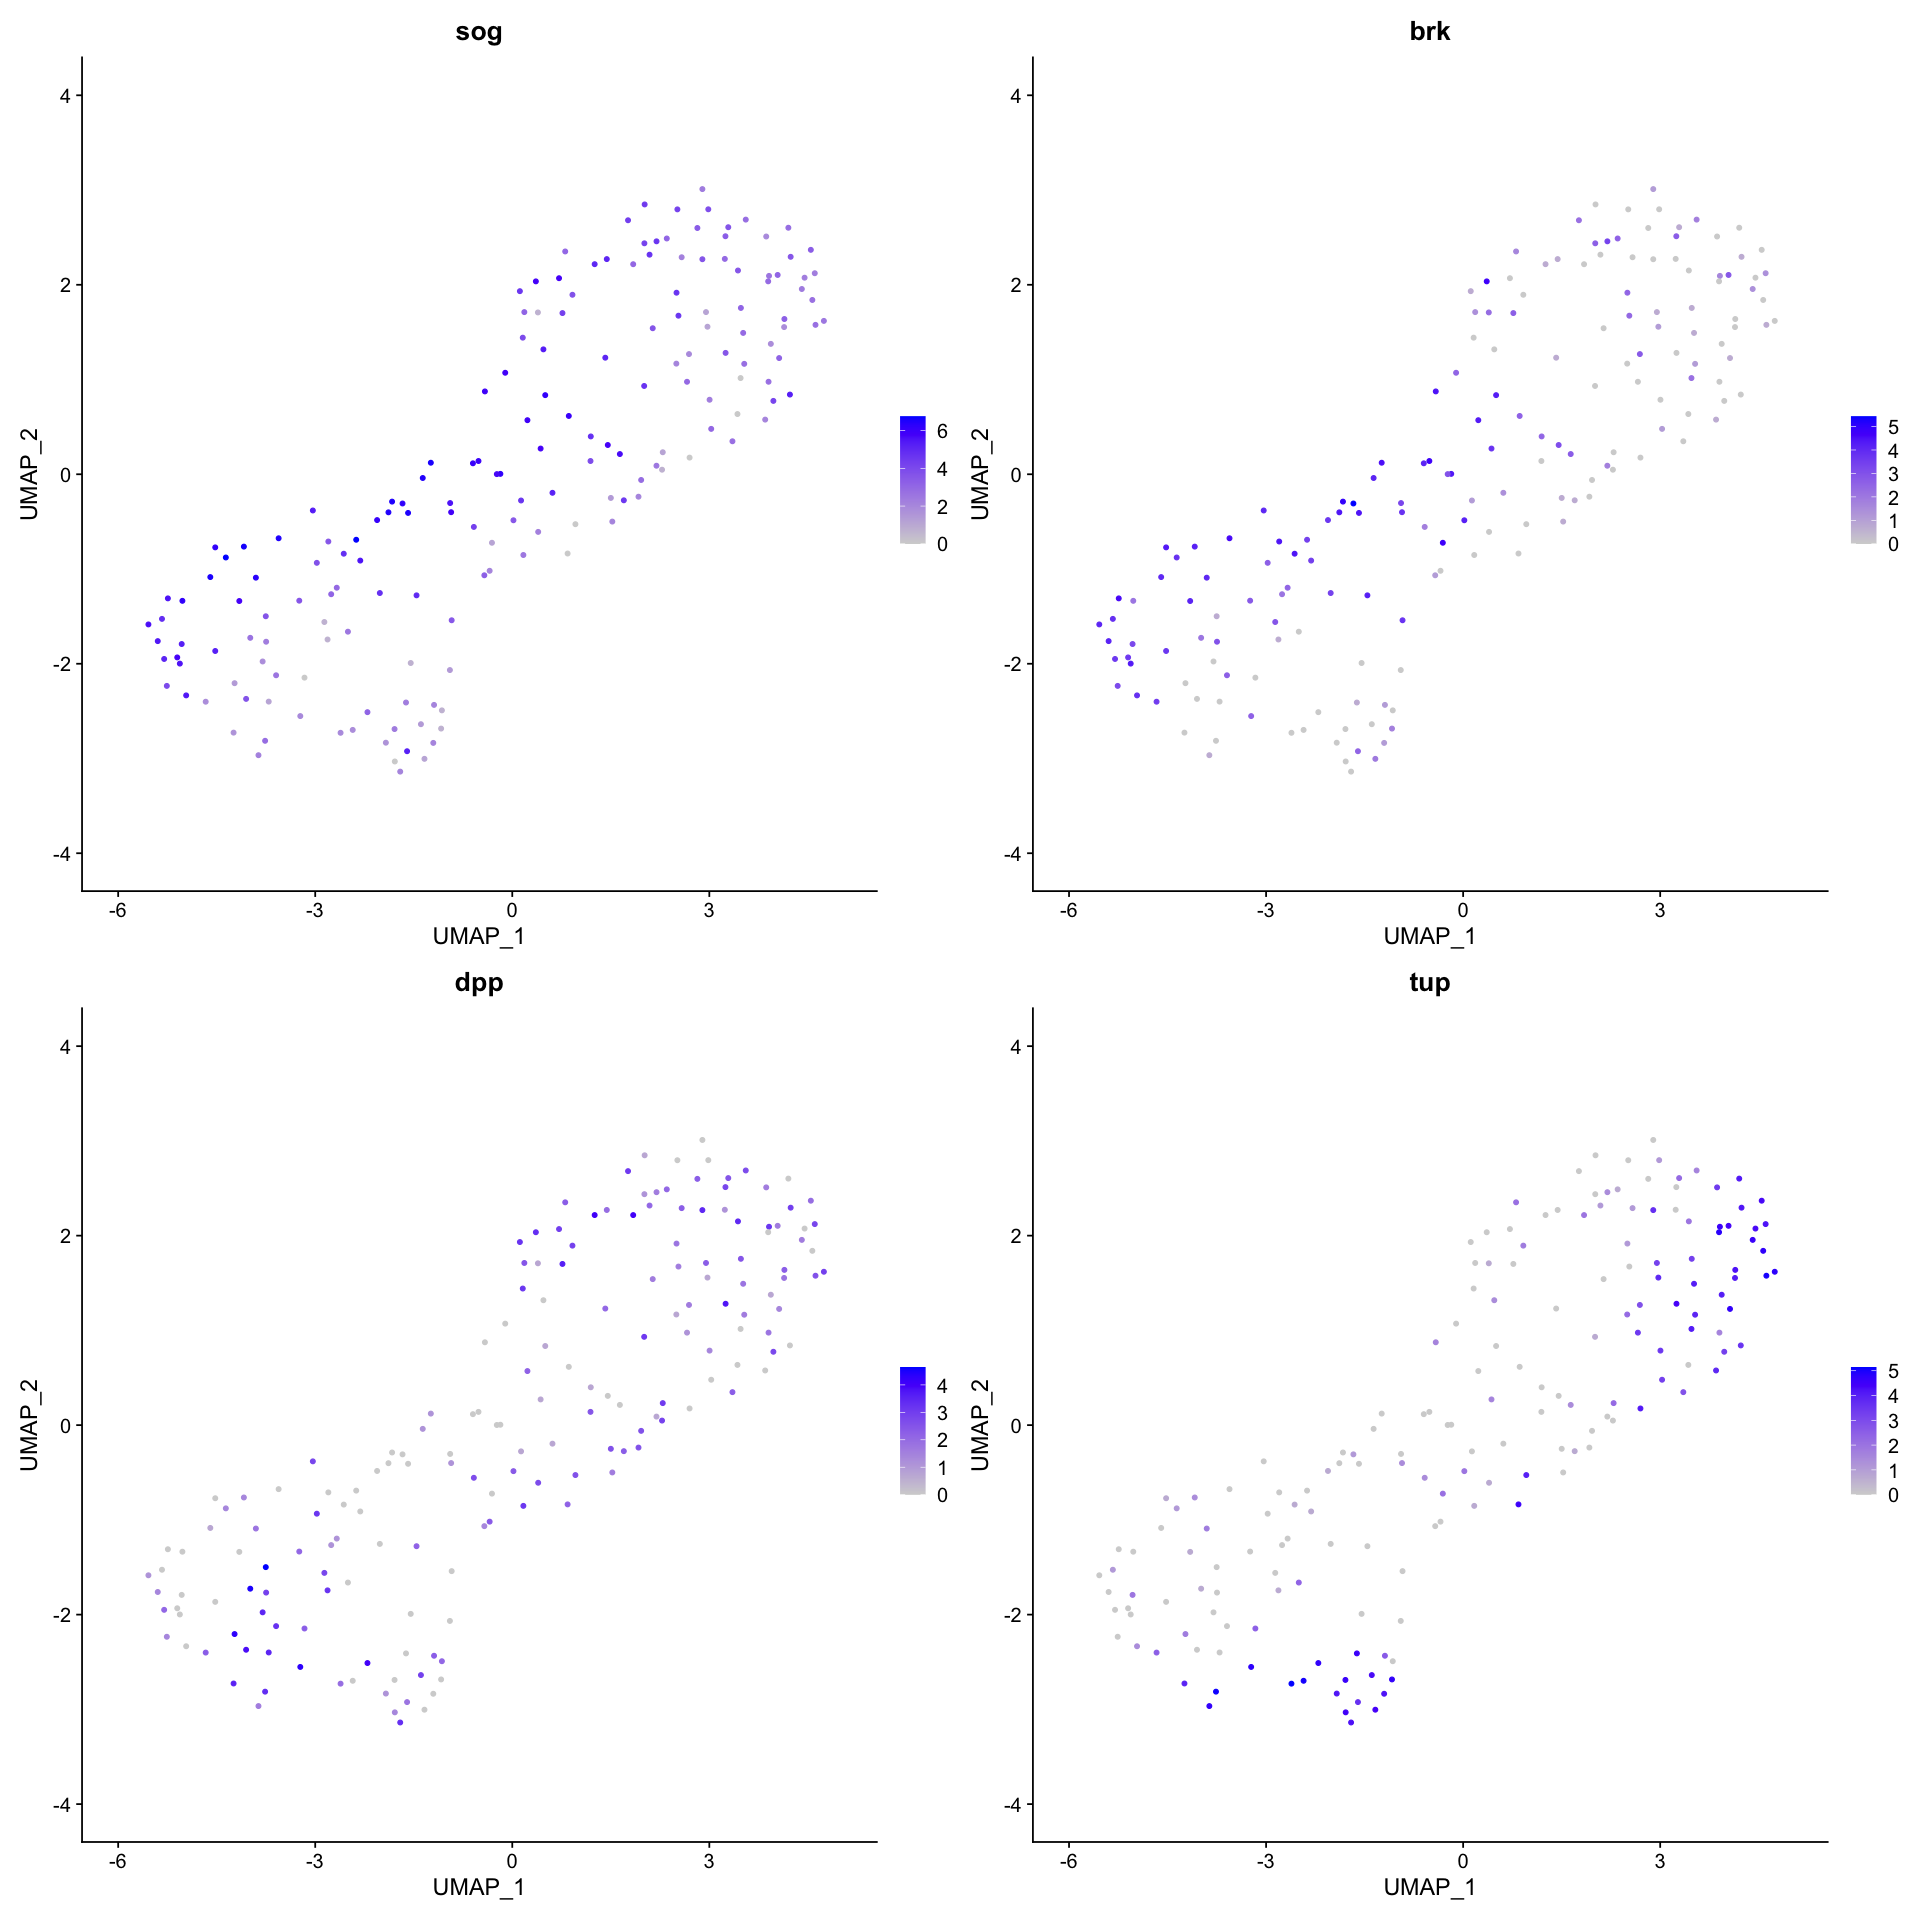

In [14]:
options(repr.plot.width=16, repr.plot.height=16)
FeaturePlot(seu.post, reduction = "umap", features = c("sog", "brk", "dpp", "tup"), pt.size = 1,  ncol = 2)

## Add annotation

,manual_ID
,<fct>
batch1_col1CATCTG,3
batch1_col1GCTGAT,1
batch1_col1TCTAGC,1
batch1_col1TGCATC,4
batch1_col2ACACTG,2
batch1_col2ATGACG,1


,manual_ID
,<fct>
batch1_col1CATCTG,ectoderm_PS14/hindgut
batch1_col1GCTGAT,ectoderm_PS14
batch1_col1TCTAGC,ectoderm_PS14
batch1_col1TGCATC,endoderm_postMG_lateral
batch1_col2ACACTG,ectoderm_hindgut_ventral
batch1_col2ATGACG,ectoderm_PS14


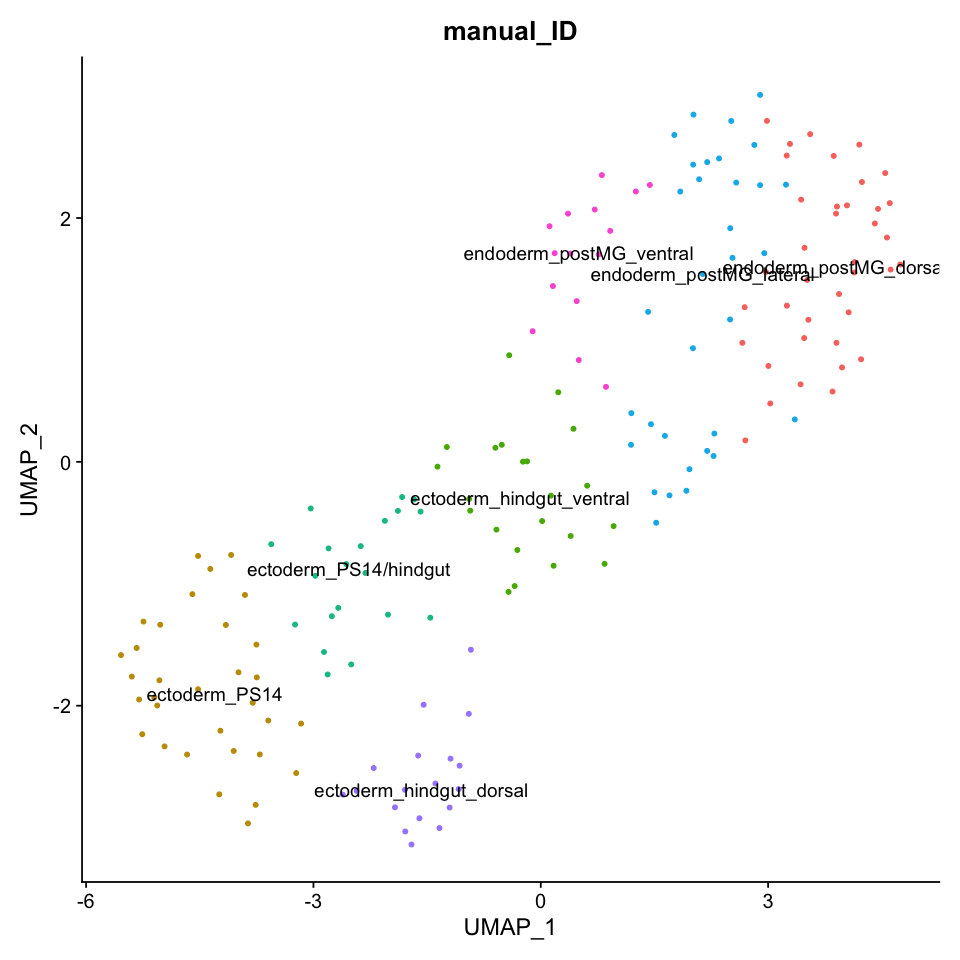

In [15]:
manual_id <- as.data.frame(seu.post$seurat_clusters)
colnames(manual_id) <- c('manual_ID')
head(manual_id)
manual_id$manual_ID <- dplyr::recode(manual_id$manual_ID, 
                                "1" = "ectoderm_PS14", #Abd-B+, byn-
                                "4" = "endoderm_postMG_lateral", #DNaseII+, sim+, peb+
                                "0" = "endoderm_postMG_dorsal", #DNaseII+, sim-, peb+
                                "2" = "ectoderm_hindgut_ventral", #byn+,
                                "3" = "ectoderm_PS14/hindgut", #byn+, Abd-B+
                                "5" = "ectoderm_hindgut_dorsal", #byn+, Doc2+
                                "6" = "endoderm_postMG_ventral", #DNaseII+, sim+, peb-
                                "7" = "endoderm_postMG_lateral" #DNaseII+
                                )
head(manual_id)

seu.post$manual_ID <- manual_id$manual_ID

options(repr.plot.width=8, repr.plot.height=8)
DimPlot(seu.post, reduction = 'umap', label = TRUE, group.by = 'manual_ID') + NoLegend()

In [16]:
Idents(seu.post) <- 'manual_ID'
levels(seu.post) <- c('ectoderm_PS14','ectoderm_PS14/hindgut','ectoderm_hindgut_ventral','ectoderm_hindgut_dorsal',
                     'endoderm_postMG_ventral','endoderm_postMG_lateral','endoderm_postMG_dorsal')

all.markers.post <- FindAllMarkers(object = seu.post, only.pos = TRUE)
nrow(all.markers.post)
all.markers.post.top10 <- all.markers.post %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)
nrow(all.markers.post.top10)

Calculating cluster ectoderm_PS14

Calculating cluster ectoderm_PS14/hindgut

Calculating cluster ectoderm_hindgut_ventral

Calculating cluster ectoderm_hindgut_dorsal

Calculating cluster endoderm_postMG_ventral

Calculating cluster endoderm_postMG_lateral

Calculating cluster endoderm_postMG_dorsal



[1] 1600

[1] 70

Warning message in DoHeatmap(seu.post, features = c("Abd-B", "byn", "hkb", "fkh", :
“The following features were omitted as they were not found in the scale.data slot for the SCT assay: Myo10A”


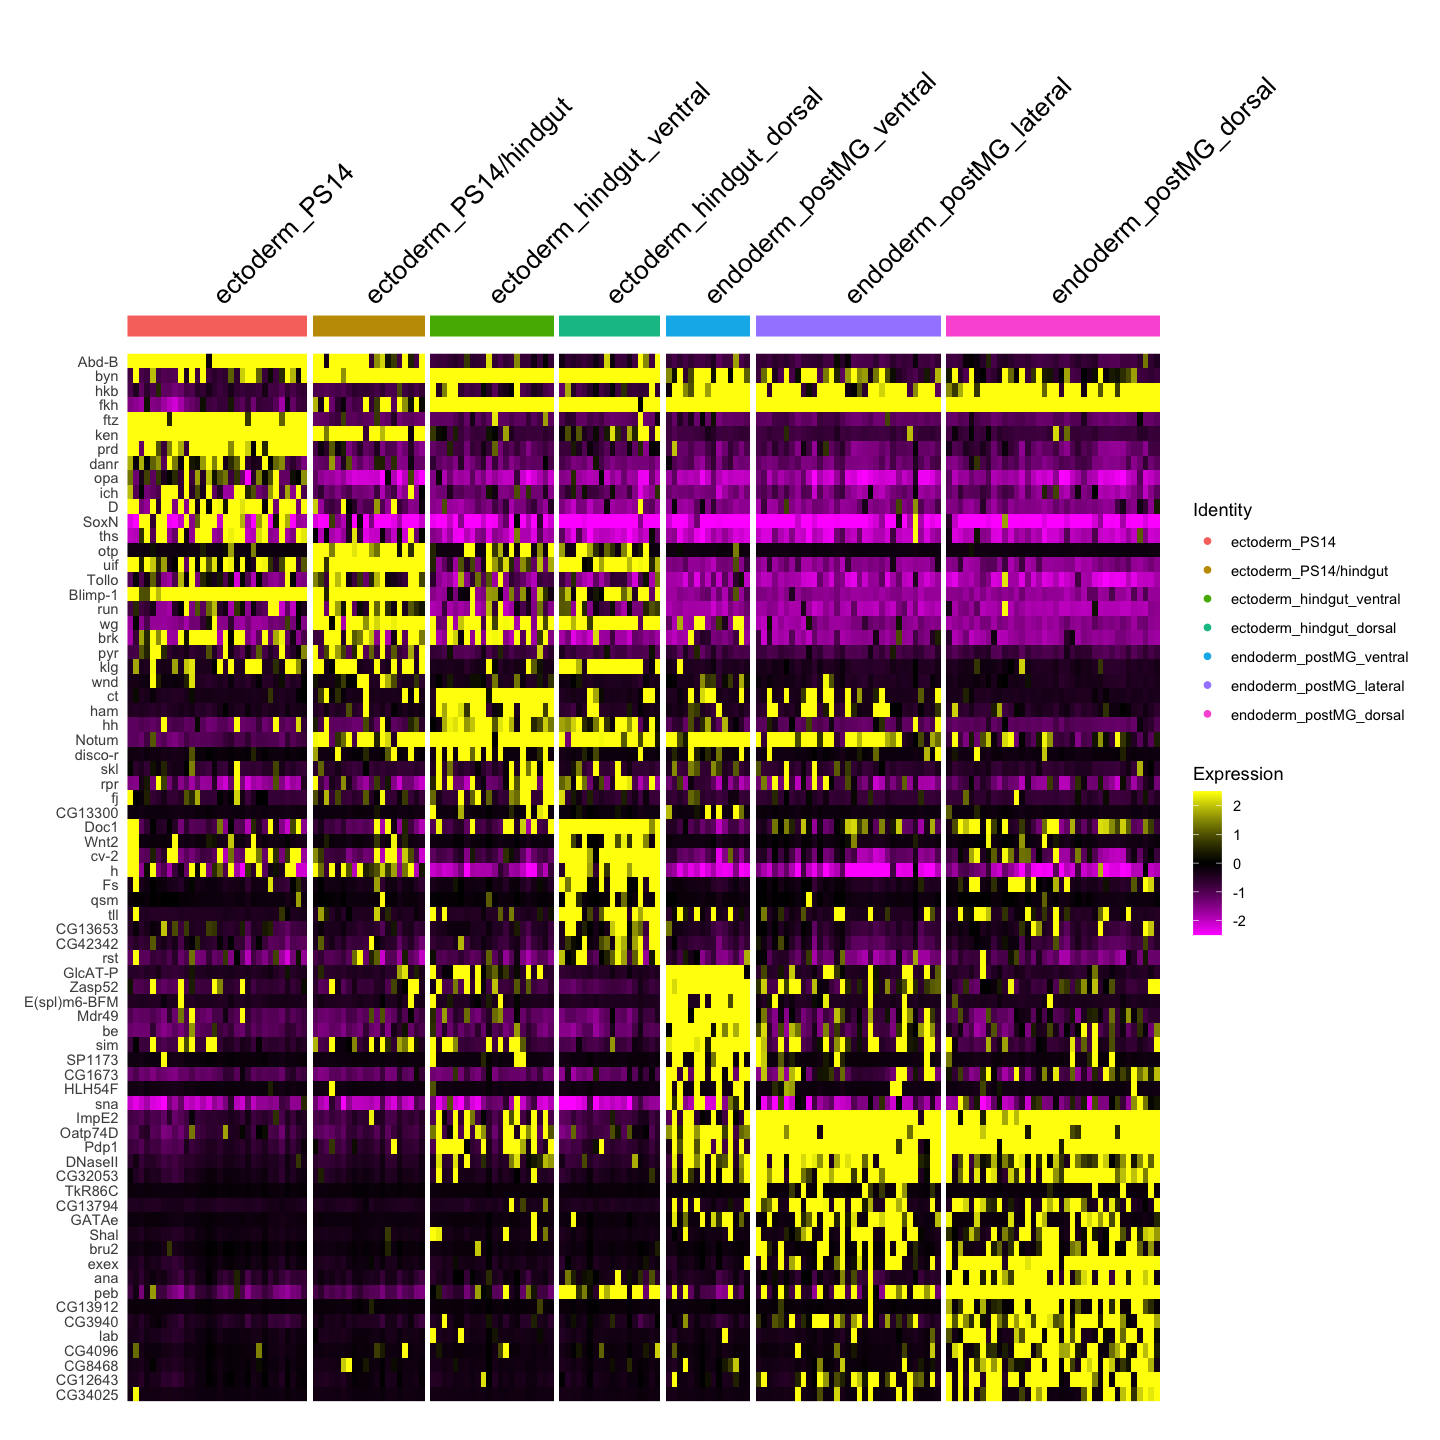

In [17]:
options(repr.plot.width=12, repr.plot.height=12)
DoHeatmap(seu.post, features = c('Abd-B','byn','hkb','fkh',all.markers.post.top10$gene))

Saving 7 x 7 in image



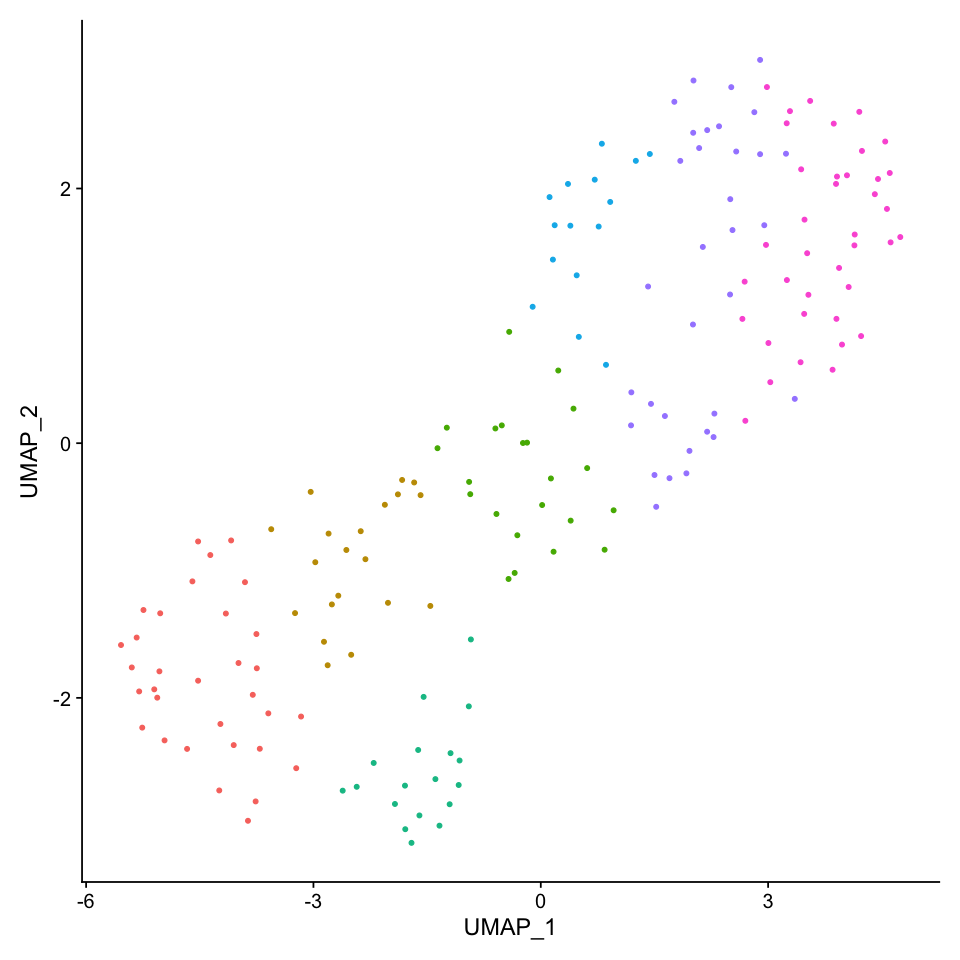

In [18]:
options(repr.plot.width=8, repr.plot.height=8)
fig <- DimPlot(seu.post, reduction =  "umap", label = FALSE) + NoLegend() 

fig
ggsave(fig, file = "./figures/07_posterior_subclustering_Set1/post_umap1.eps", dpi = 300)

Saving 7 x 7 in image



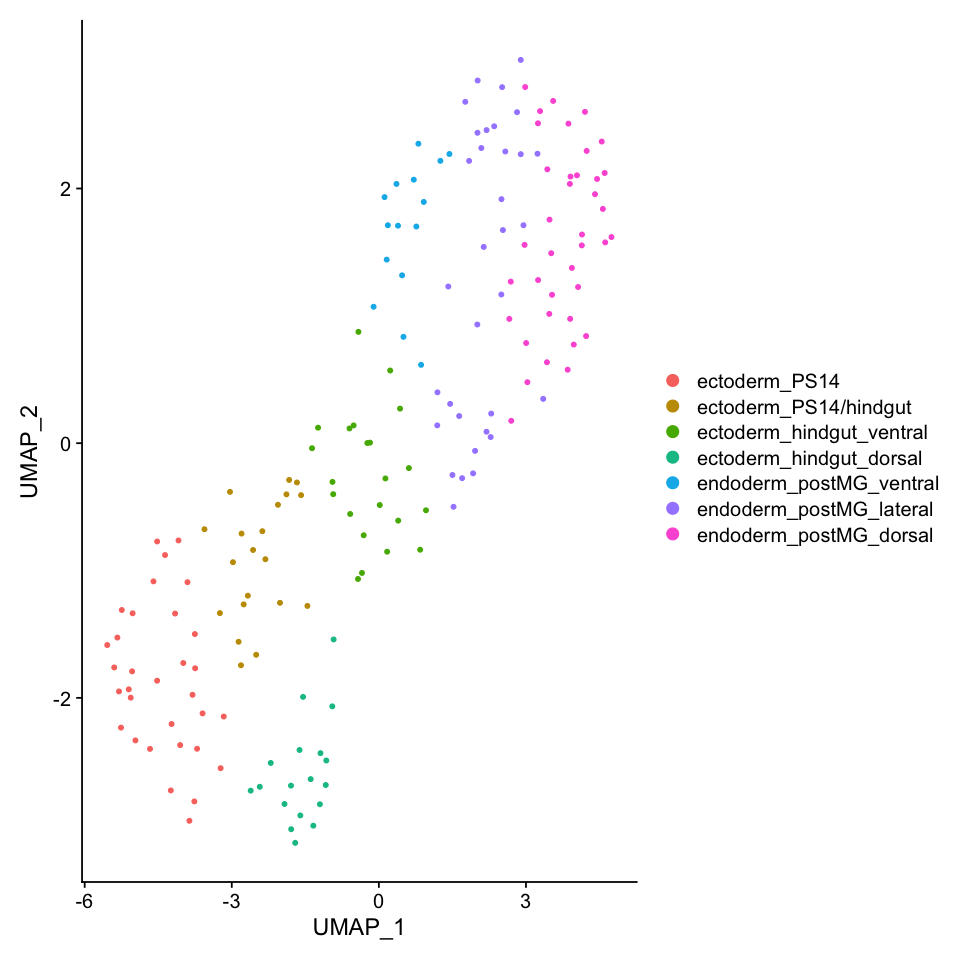

In [19]:
options(repr.plot.width=8, repr.plot.height=8)
fig <- DimPlot(seu.post, reduction =  "umap", label = FALSE)

fig
ggsave(fig, file = "./figures/07_posterior_subclustering_Set1/post_umap2.eps", dpi = 300)

Warning message in DoHeatmap(seu.post, features = c(all.markers.post.top10$gene)):
“The following features were omitted as they were not found in the scale.data slot for the SCT assay: Myo10A”


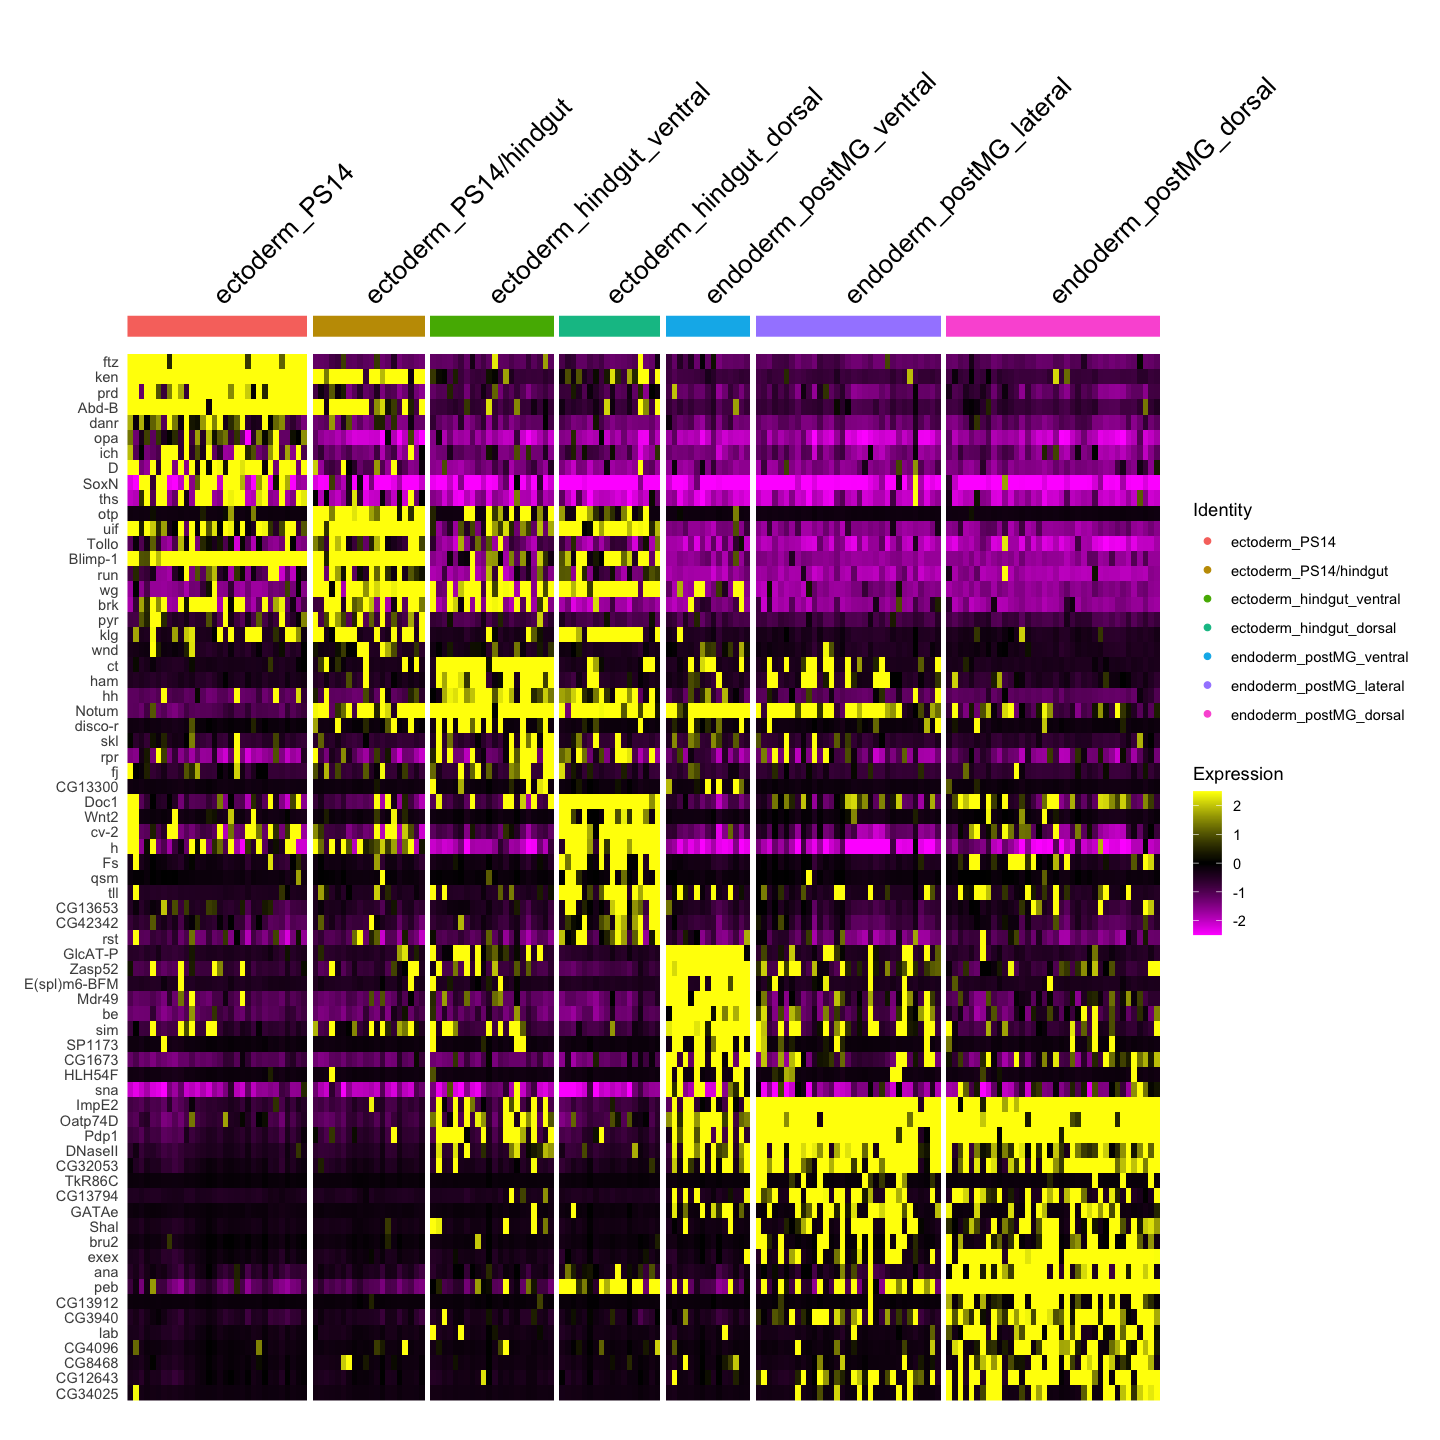

In [20]:
options(repr.plot.width=12, repr.plot.height=12)
fig <- DoHeatmap(seu.post, features = c(all.markers.post.top10$gene))
fig
ggsave(fig, file = "./figures/07_posterior_subclustering_Set1/post_manualID_heatmap.eps", dpi = 300,  width = 12, height = 8)

In [21]:
seu.others <- subset(seu_HQC, cells=colnames(seu.post), invert=TRUE)
seu.others$manual_ID <- 'others'
seu.result <- merge(x=seu.post, y=seu.others)
seu_HQC$manual_ID <- as.data.frame(seu.result$manual_ID)

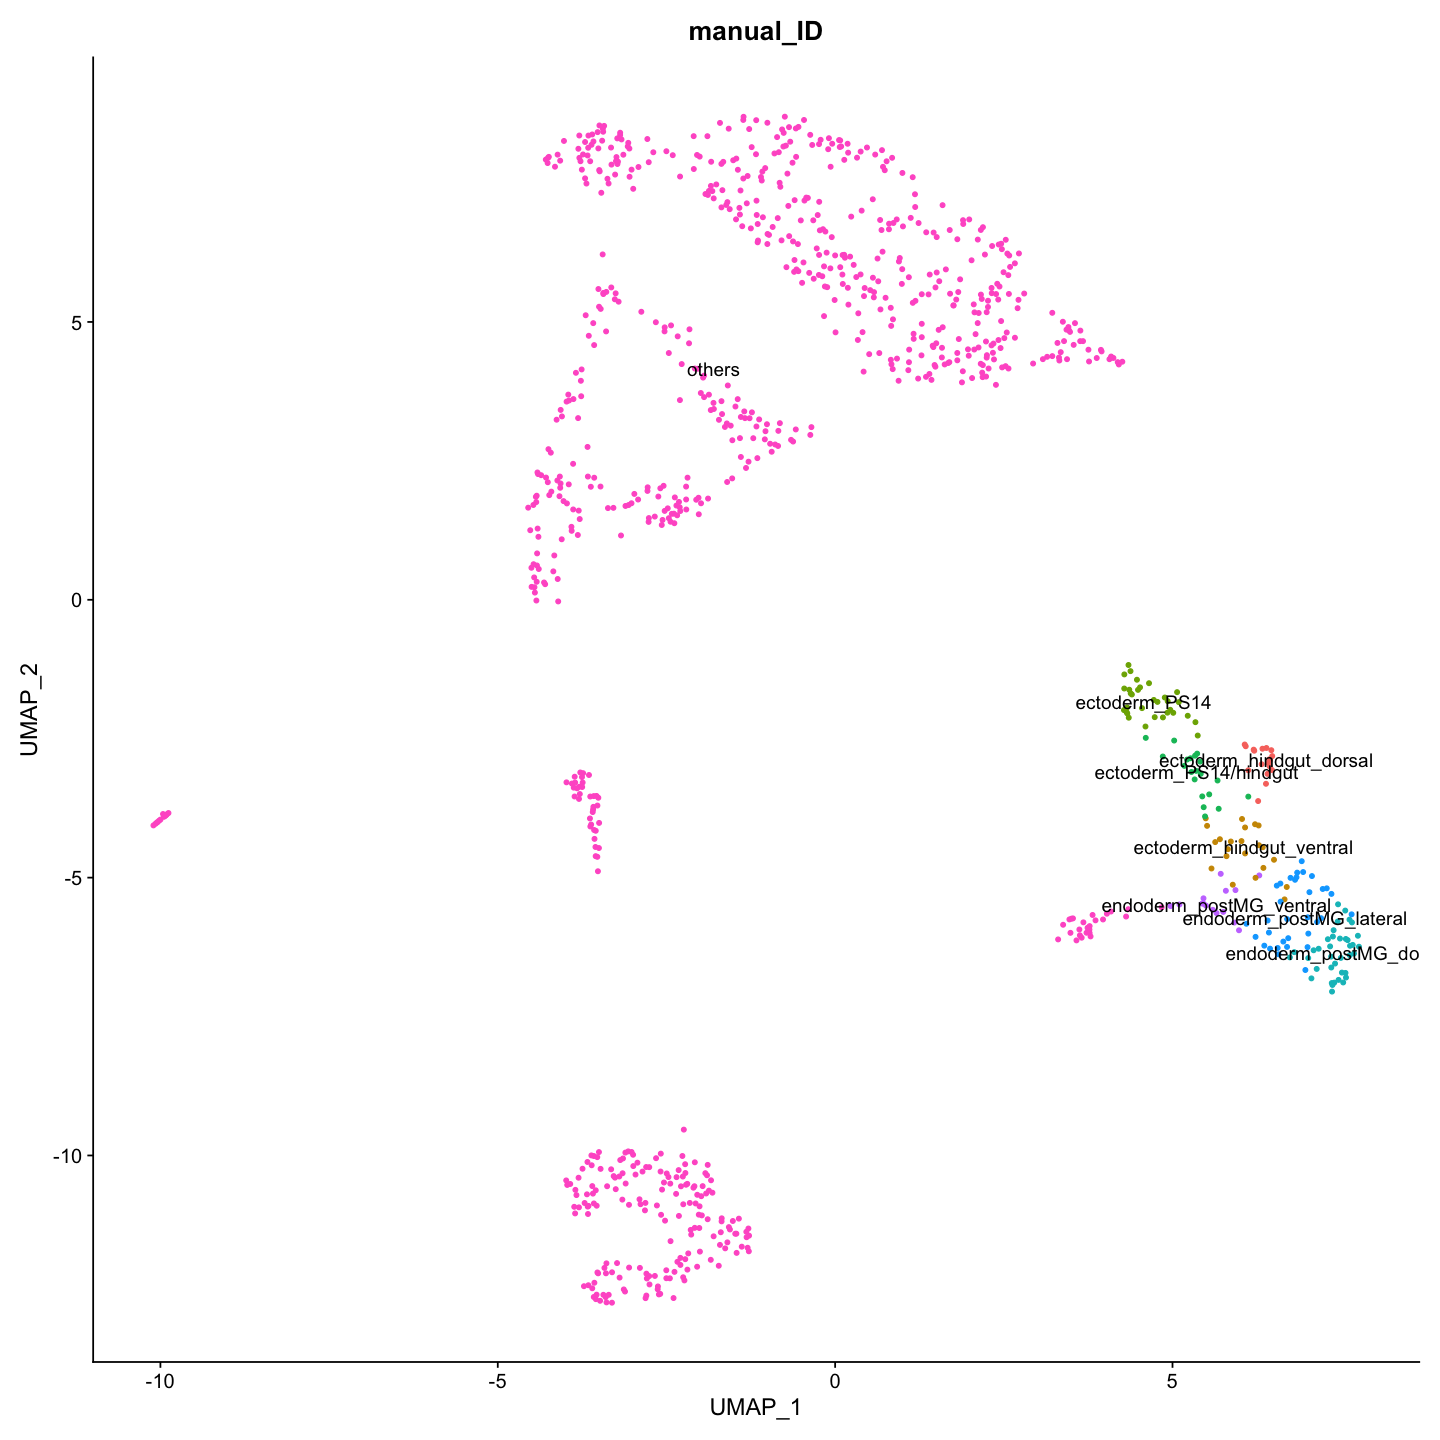

In [22]:
options(repr.plot.width=12, repr.plot.height=12)
DimPlot(seu_HQC, reduction =  "umap", label = TRUE, group.by = 'manual_ID') + NoLegend()

In [23]:
saveRDS(object = seu.post, file = '../../data/seurat_object/Set1/subclustering/seu_post_endo_subclustered.obj')

In [24]:
sessionInfo()

R version 4.0.3 (2020-10-10)
Platform: x86_64-apple-darwin17.0 (64-bit)
Running under: macOS Catalina 10.15.7

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRblas.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRlapack.dylib

locale:
[1] ja_JP.UTF-8/ja_JP.UTF-8/ja_JP.UTF-8/C/ja_JP.UTF-8/ja_JP.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] tibble_3.0.5      dplyr_1.0.3       Matrix_1.3-2      data.table_1.13.6
[5] magrittr_2.0.1    ggplot2_3.3.3     Seurat_3.2.3     

loaded via a namespace (and not attached):
  [1] nlme_3.1-151          matrixStats_0.57.0    RcppAnnoy_0.0.18     
  [4] RColorBrewer_1.1-2    httr_1.4.2            repr_1.1.0           
  [7] sctransform_0.3.2     tools_4.0.3           R6_2.5.1             
 [10] irlba_2.3.3           rpart_4.1-15          KernSmooth_2.23-18   
 [13] uwot_0.1.10           mgcv